## 시계열 데이터
- 한글 헤더 읽기 EUC_KR

In [1]:
!curl https://raw.githubusercontent.com/StillWork/data/master/weather_data.csv\
    -o ./weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 78415  100 78415    0     0   295k      0 --:--:-- --:--:-- --:--:--  296k


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open("weather.csv", "rt", encoding="EUC_KR") as fr:
    lines = fr.readlines()

In [4]:
lines[:10]

['저장한 날짜: 2017/10/24 11:09:57,,,\n',
 ',,,\n',
 ',서울,서울,서울\n',
 '연월일,평균기온,평균기온,평균기온\n',
 ',,품질정보,균질정보\n',
 '2006/1/1,3.6,8,1\n',
 '2006/1/2,4,8,1\n',
 '2006/1/3,3.7,8,1\n',
 '2006/1/4,4,8,1\n',
 '2006/1/5,3.6,8,1\n']

In [5]:
n_lines = ["연월일,기온,품질,균질\n"] + lines[5:]

In [6]:
n_lines[:10]

['연월일,기온,품질,균질\n',
 '2006/1/1,3.6,8,1\n',
 '2006/1/2,4,8,1\n',
 '2006/1/3,3.7,8,1\n',
 '2006/1/4,4,8,1\n',
 '2006/1/5,3.6,8,1\n',
 '2006/1/6,2.1,8,1\n',
 '2006/1/7,2.8,8,1\n',
 '2006/1/8,4.2,8,1\n',
 '2006/1/9,3.7,8,1\n']

In [7]:
# n_lines = map(lambda x: x.replace('/', ','), n_lines)
result = "".join(n_lines).strip()

with open("new_data.csv", "wt", encoding="utf-8") as fw:
    fw.write(result)

In [8]:
import pandas as pd
df = pd.read_csv('new_data.csv', encoding="utf-8")
df.shape

(4018, 4)

In [9]:
df

,연월일,기온,품질,균질
0,2006/1/1,3.6,8,1
1,2006/1/2,4.0,8,1
2,2006/1/3,3.7,8,1
3,2006/1/4,4.0,8,1
4,2006/1/5,3.6,8,1
...,...,...,...,...
4013,2016/12/27,11.1,8,2
4014,2016/12/28,6.0,8,2
4015,2016/12/29,4.3,8,2
4016,2016/12/30,6.0,8,2


In [10]:
!head -10 new_data.csv

연월일,기온,품질,균질
2006/1/1,3.6,8,1
2006/1/2,4,8,1
2006/1/3,3.7,8,1
2006/1/4,4,8,1
2006/1/5,3.6,8,1
2006/1/6,2.1,8,1
2006/1/7,2.8,8,1
2006/1/8,4.2,8,1
2006/1/9,3.7,8,1


In [11]:
df.describe()

,기온,품질,균질
count,4018.000000,4018.0,4018.000000
mean,16.652240,8.0,1.189398
std,7.928747,0.0,0.391873
min,0.300000,8.0,1.000000
25%,9.400000,8.0,1.000000
50%,17.200000,8.0,1.000000
75%,23.100000,8.0,1.000000
max,33.200000,8.0,2.000000


In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [13]:
def split_seq(data, n_steps):
    x, y = [], []
    for i in range(len(data)):
        if i > len(data) - n_steps - 1 : break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x), np.array(y)

In [14]:
data = [1,2,3,4,5,6,7,8,9,10]
x_train,y_train = split_seq(data, 5)
list(zip(x_train, y_train))

[(array([1, 2, 3, 4, 5]), 6),
 (array([2, 3, 4, 5, 6]), 7),
 (array([3, 4, 5, 6, 7]), 8),
 (array([4, 5, 6, 7, 8]), 9),
 (array([5, 6, 7, 8, 9]), 10)]

In [20]:
y = df["기온"].values
train = y[:3000]
test = y[3000:]

In [21]:
train.shape

(3000,)

In [16]:
lr = LinearRegression(normalize=True)
for i in range(30):
    n_steps=i+1
    x_train, y_train = split_seq(train, n_steps)
    x_test, y_test = split_seq(test, n_steps)
    lr.fit(x_train, y_train) 
    print(n_steps, lr.score(x_test, y_test)) # R2

1 0.9272046318634504
2 0.9277257794239193
3 0.9310803622464703
4 0.9321080068531865
5 0.9323557847755772
6 0.933697001747057
7 0.9339649238557011
8 0.9347325056188468
9 0.9347721403438732
10 0.9353090415149158
11 0.9353241661764797
12 0.9353578795161244
13 0.9353113973573391
14 0.9354834369651389
15 0.9354120642816421
16 0.9354499948891992
17 0.9357162910400607
18 0.9361071638754495
19 0.9361144702757022
20 0.9362848609637642
21 0.9362812596033756
22 0.9363501890087874
23 0.9365129078090078
24 0.9364597384195363
25 0.9364610458136065
26 0.9366803638309333
27 0.9365835857703793
28 0.9368609450784653
29 0.9369536331442994
30 0.9371705409972666


In [17]:
lr.coef_

array([-0.04226384, -0.00588213, -0.01898268,  0.00751446, -0.02661358,
        0.03543942,  0.01013515, -0.05483496,  0.03538212,  0.00743129,
       -0.02334996,  0.02754747, -0.01317899,  0.04096963, -0.0055793 ,
        0.02328779,  0.02401116, -0.03457517,  0.04604176, -0.00165348,
        0.02817372,  0.0348042 ,  0.01200083,  0.04077953,  0.03433004,
        0.03704873,  0.00578057,  0.10396748, -0.16052469,  0.81607202])

In [18]:
x_train.shape, y_train.shape

((2970, 30), (2970,))

In [19]:
len(x_train), len(x_test)

(2970, 988)

10 0.9353090415149158


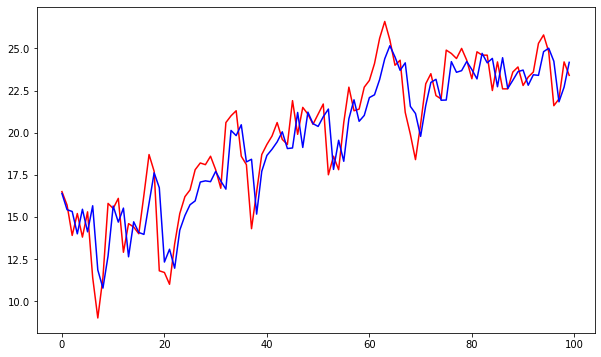

In [23]:
lr = LinearRegression(normalize=True)

# 최적값 사용 N=10

n_steps = 10
x_train, y_train = split_seq(train, n_steps)
x_test, y_test = split_seq(test, n_steps)
lr.fit(x_train, y_train) 
y_pred = lr.predict(x_test)
print(n_steps, lr.score(x_test, y_test)) # R2

# 결과를 그래프로 그리기
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], c='r')
plt.plot(y_pred[:100], c='b')
plt.show()

In [24]:
lr.coef_, lr.intercept_

(array([ 0.04034805,  0.03335062,  0.01050254,  0.04730877,  0.0322806 ,
         0.0423239 ,  0.00390991,  0.10892331, -0.15805269,  0.82550126]),
 0.22996970252452087)

In [25]:
error = np.abs(y_pred  - y_test)
print("MAE=", error.mean())
print("max=", max(error))
print(lr.score(x_test, y_test)) # R2

MAE= 1.4992721234688688
max= 8.623504996019207
0.9353090415149158


In [26]:
y_pred.shape, y_test.shape

((1008,), (1008,))

# 나이브 모델 사용과 비교

In [28]:
def naive_model(x_seq):
    return np.array(x_seq).mean(axis=1)

In [29]:
from sklearn.metrics import r2_score

In [35]:
x_test, y_test = split_seq(test, 1) # persistent 모델
# m.fit(x_train, y_train)
y_pred = naive_model(x_test)
print(r2_score(y_test, y_pred))

0.9258750668248465


## Prophet 사용과 비교

In [46]:
from fbprophet import Prophet

In [36]:
df

,연월일,기온,품질,균질
0,2006/1/1,3.6,8,1
1,2006/1/2,4.0,8,1
2,2006/1/3,3.7,8,1
3,2006/1/4,4.0,8,1
4,2006/1/5,3.6,8,1
...,...,...,...,...
4013,2016/12/27,11.1,8,2
4014,2016/12/28,6.0,8,2
4015,2016/12/29,4.3,8,2
4016,2016/12/30,6.0,8,2


In [37]:
 df = df.drop(["품질", "균질"], axis=1);df

,연월일,기온
0,2006/1/1,3.6
1,2006/1/2,4.0
2,2006/1/3,3.7
3,2006/1/4,4.0
4,2006/1/5,3.6
...,...,...
4013,2016/12/27,11.1
4014,2016/12/28,6.0
4015,2016/12/29,4.3
4016,2016/12/30,6.0


In [38]:
df.columns = ['ds', 'y']
df

,ds,y
0,2006/1/1,3.6
1,2006/1/2,4.0
2,2006/1/3,3.7
3,2006/1/4,4.0
4,2006/1/5,3.6
...,...,...
4013,2016/12/27,11.1
4014,2016/12/28,6.0
4015,2016/12/29,4.3
4016,2016/12/30,6.0


In [39]:
df.ds = df.ds.apply(pd.to_datetime)

In [40]:
df.ds

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4013   2016-12-27
4014   2016-12-28
4015   2016-12-29
4016   2016-12-30
4017   2016-12-31
Name: ds, Length: 4018, dtype: datetime64[ns]

In [41]:
df

,ds,y
0,2006-01-01,3.6
1,2006-01-02,4.0
2,2006-01-03,3.7
3,2006-01-04,4.0
4,2006-01-05,3.6
...,...,...
4013,2016-12-27,11.1
4014,2016-12-28,6.0
4015,2016-12-29,4.3
4016,2016-12-30,6.0


In [44]:
train = df[:3000]
test = df[3000:]
train.shape, test.shape

((3000, 2), (1018, 2))

In [47]:
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future_test = test.drop('y',axis=1);future_test

,ds
3000,2014-03-20
3001,2014-03-21
3002,2014-03-22
3003,2014-03-23
3004,2014-03-24
...,...
4013,2016-12-27
4014,2016-12-28
4015,2016-12-29
4016,2016-12-30


In [50]:
forecast = model.predict(future_test)

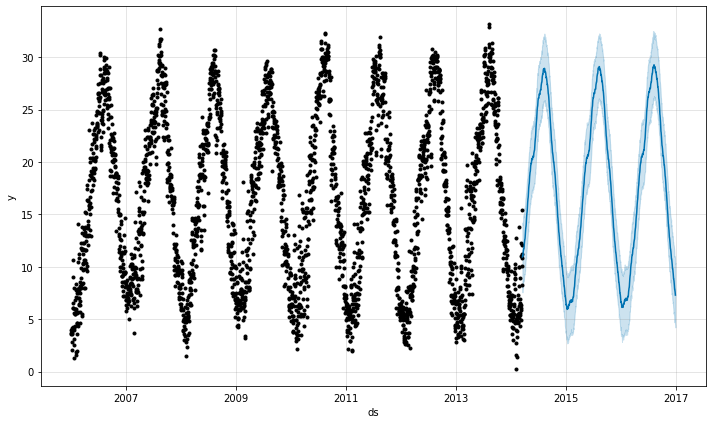

In [51]:
model.plot(forecast); plt.show()

In [53]:
y_pred = forecast['yhat'].values
y_pred.shape

(1018,)

In [54]:
y_test = test.y.values
y_test.shape

(1018,)

In [55]:
r2_score(y_test, y_pred)

0.8833241104358059